In [1]:
# Installs e imports necesarios
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
import pydotplus
import graphviz
from dmba import plotDecisionTree, classificationSummary, regressionSummary

# Graphics
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Preprocessing and modelling
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error
# mlxtend library
# ------------------------------------------------------------------------------

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

import matplotlib.pyplot as plt
import seaborn as sns
from dmba import plotDecisionTree, classificationSummary, regressionSummary

%matplotlib inline

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
#warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

In [50]:
import seaborn as sns    
raw_data = pd.read_csv('cardio_train.csv', sep=';')
#quiero que se indexe raw_data por id
raw_data.set_index('id', inplace=True)
raw_data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1


In [51]:
# Display the number of rows and all column names
raw_data=raw_data.dropna()
num_rows = raw_data.shape[0]
all_columns = raw_data.columns.tolist()

num_rows, all_columns

(70000,
 ['age',
  'gender',
  'height',
  'weight',
  'ap_hi',
  'ap_lo',
  'cholesterol',
  'gluc',
  'smoke',
  'alco',
  'active',
  'cardio'])

In [52]:
# Estadísticas descriptivas de las personas estudiadas
print("Estadísticas de pacientes:")
# Calcula la media de la columna 'avg_salary'
average_age_days = raw_data['age'].mean()
average_age_years = average_age_days/365
#convierte los decimales de average_age_years a meses
#coge la parte decimal de average_age_years y la multiplica por 12
decimal_part = average_age_years - int(average_age_years)
average_age_months = decimal_part * 12

# Imprime el resultado redondeado a dos decimales
print(f"Edad media del estuido: {int(average_age_years)} años y {int(average_age_months)} meses")

Estadísticas de pacientes:
Edad media del estuido: 53 años y 4 meses


In [53]:
# Creating new Variables

raw_data['bmi'] = (raw_data['weight'] / (((raw_data['height']/100)**2))).round(decimals=2)   # Body mass index
raw_data['age_years'] = (raw_data['age']/365).round(decimals=2)                               # Age in years

#creando variable overweight
#0 si el bmi es menor que 25, 1 si es mayor o igual que 25 y menor que 30, 2 si es mayor o igual que 30
raw_data['overweight'] = raw_data['bmi'].apply(lambda x: 0 if x < 25 else 1 if x < 30 else 2)
raw_data['gender_string'] = raw_data['gender'].apply(lambda x: 'female' if x == 1 else 'male')

raw_data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age_years,overweight,gender_string
id,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.97,50.39,0,male
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.93,55.42,2,female
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.51,51.66,0,female
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.71,48.28,1,male
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.01,47.87,0,female


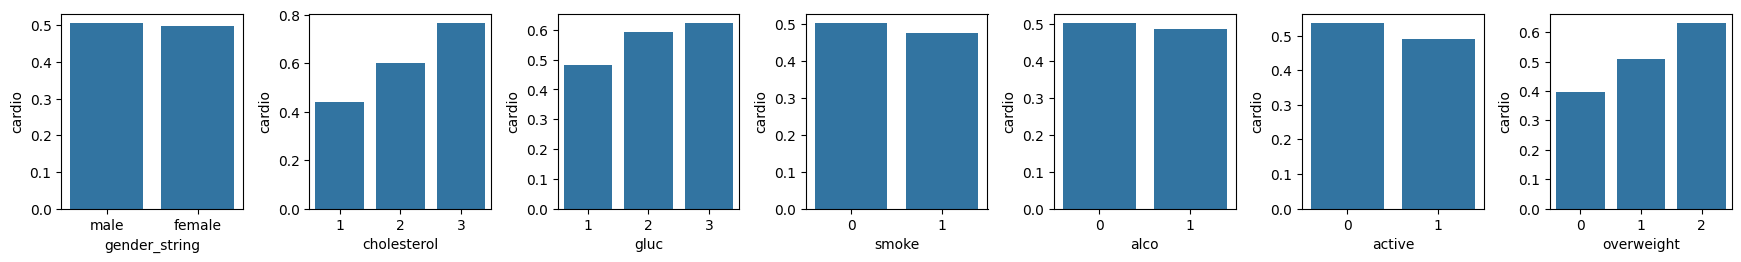

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

In [54]:
# Visualizing Discrete variables and its effects on cardio
variables = ('gender_string', 'cholesterol',	'gluc',	'smoke','alco',	'active', 'overweight')
fig=plt.figure(figsize=(20,20))
j = 1
for i in variables:
  ax=fig.add_subplot(8,8,j)
  j = j + 1
  plt.figure(figsize=(2, 2))
  sns.barplot(x=i,y='cardio',data=raw_data,ci=None,ax=ax)
  fig.tight_layout()  
plt.show()

Text(0, 0.5, 'Num personas')

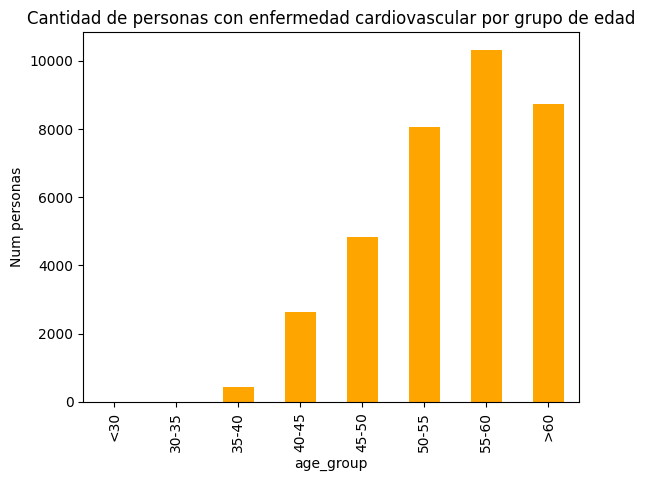

In [55]:
# Analisis de edades
raw_data['age_years'].min()#29.58
raw_data['age_years'].max()#64.97

# agrupar raw_data en 8 grupos de edades: <30, 30-35, 35-40, 40-45, 45-50, 50-55, 55-60, >60
raw_data['age_group'] = pd.cut(raw_data['age_years'], bins=[29, 30, 35, 40, 45, 50, 55, 60, 65], labels=['<30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '>60'])
#plot cantidad de personas en cada grupo con cardio=1
raw_data.groupby('age_group')['cardio'].sum() #hacer plot de esto
raw_data.groupby('age_group')['cardio'].sum().plot(kind='bar', color='orange') #titulo: cantidad de personas con enfermedad cardiovascular por grupo de edad
plt.title('Cantidad de personas con enfermedad cardiovascular por grupo de edad')
plt.ylabel('Num personas')

Text(0.5, 1.0, 'Correlation Map')

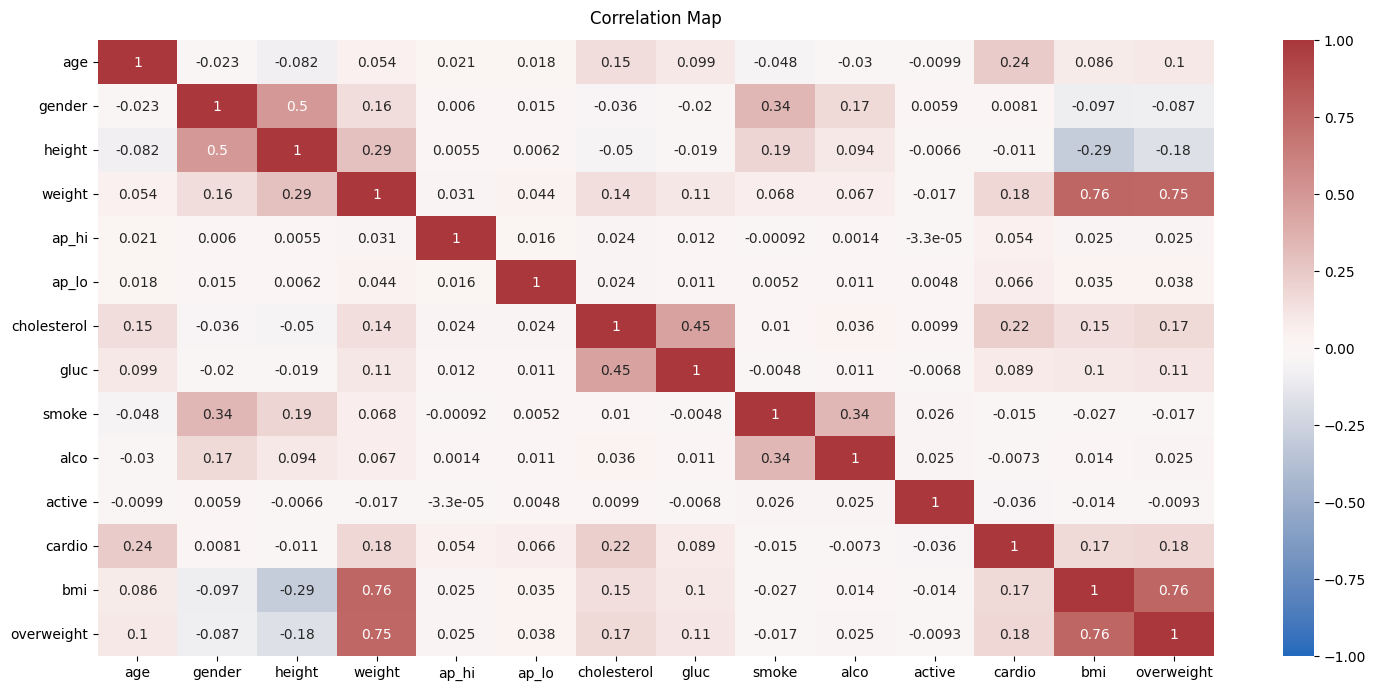

In [60]:
# Matriz de correlacion
# Correlation matrix to understand relation between variables

plt.figure(figsize=(18, 8))
data_without_age_gender = raw_data.drop(columns=['gender_string', 'age_group', 'age_years'])
sns.heatmap(data_without_age_gender.corr(), vmin=-1, vmax=1, annot=True, cmap='vlag') #raw_data sin age_gender

# cmap='BrBG'
plt.title('Correlation Map', fontdict={'fontsize':12}, pad=12)

Text(0, 0.5, 'Recuento')

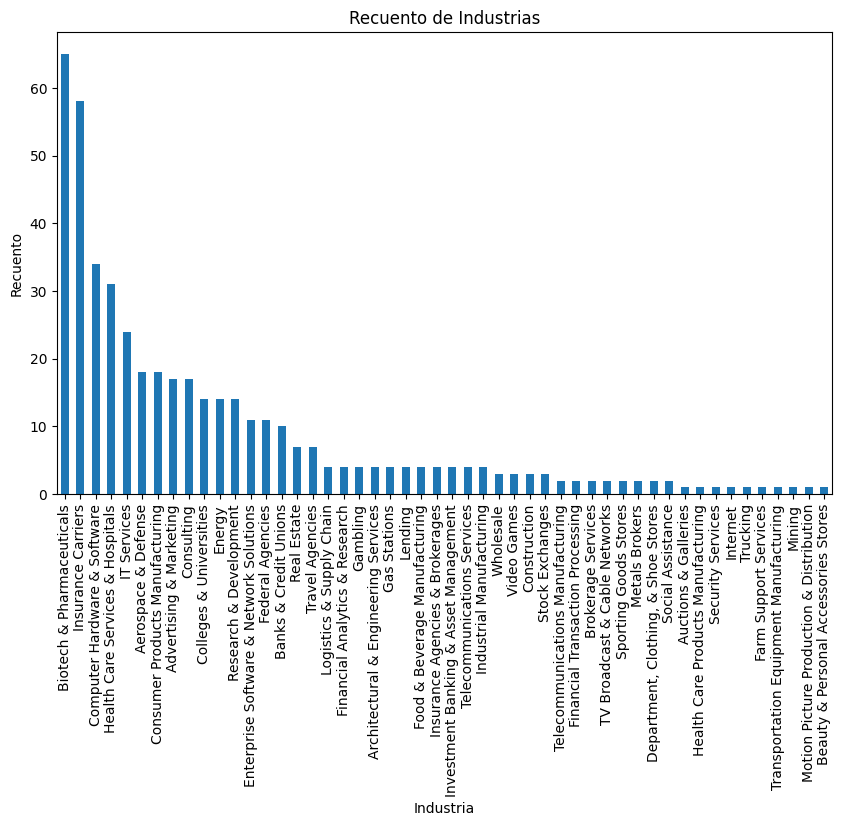

In [31]:
# Calcular los recuentos de valores de la columna 'Industry'
industry_counts = raw_data['Industry'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño opcional del gráfico
industry_counts.plot(kind='bar')

# Personalizar el gráfico
plt.title('Recuento de Industrias')
plt.xlabel('Industria')
plt.ylabel('Recuento')

In [32]:
# Tipos de trabajos
print("\nTipos de Trabajos en el Dataset:")
print(raw_data['Job Title'].value_counts())



Tipos de Trabajos en el Dataset:
Job Title
Data Scientist                                                        63
Data Engineer                                                         28
Senior Data Scientist                                                 20
Data Analyst                                                           9
Marketing Data Analyst                                                 6
                                                                      ..
Scientist 2, QC Viral Vector                                           1
Data Scientist/ML Engineer                                             1
Senior Research Scientist - Embedded System Development for DevOps     1
Data Scientist - Bioinformatics                                        1
Data Architect / Data Modeler                                          1
Name: count, Length: 185, dtype: int64


Text(0, 0.5, 'Recuento')

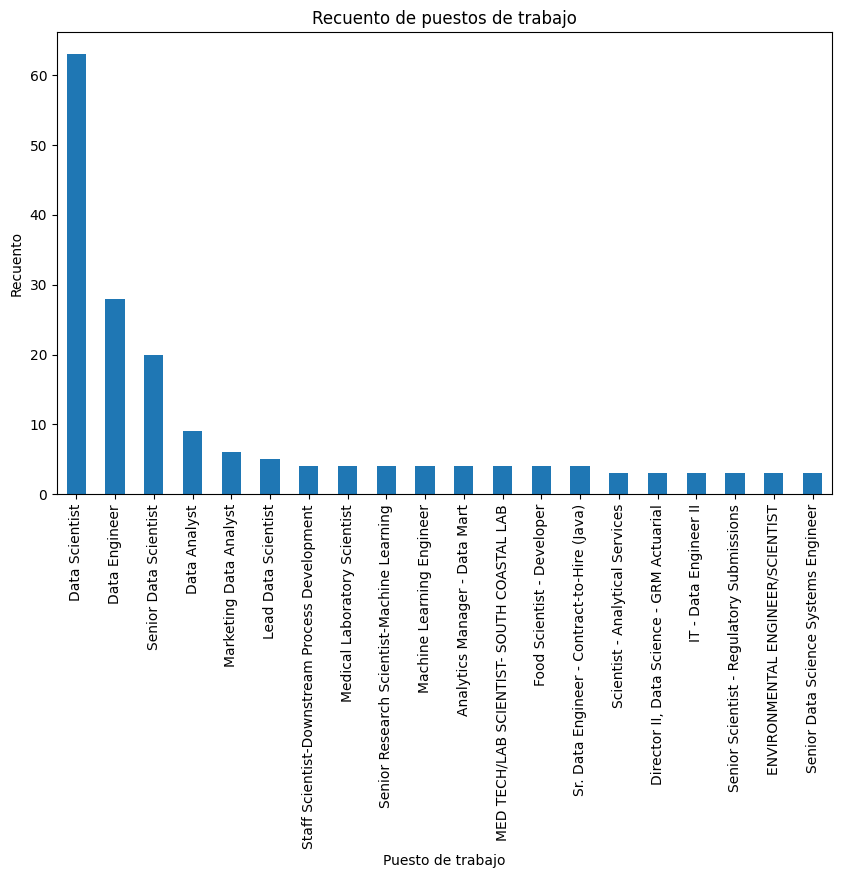

In [33]:
# Calcular los recuentos de valores de la columna 'Job Title' - los 20 primeros
job_titles = raw_data['Job Title'].value_counts().head(20)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño opcional del gráfico
job_titles.plot(kind='bar')

# Personalizar el gráfico
plt.title('Recuento de puestos de trabajo')
plt.xlabel('Puesto de trabajo')
plt.ylabel('Recuento')

## 1) Algoritmo Apriori

Vamos a tratar de encontrar los puestos mejor pagados del sector.
Para ello haremos uso del algoritmo Apriori usando TransactionEncoder

In [34]:
# Definir salarios mejor pagados como el cuartil superior
threshold = raw_data['avg_salary'].quantile(0.75)
print("threshold:",threshold)
raw_data['high_salary'] = raw_data['avg_salary'] >= threshold
# Preparar los datos para Transaction Encoder
data_list = raw_data.apply(lambda row: [row['Job Title'], 'High Salary'] if row['high_salary'] else [row['Job Title']], axis=1).tolist()

# Transaction Encoder
te = TransactionEncoder()
te_ary = te.fit(data_list).transform(data_list)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Aplicar Apriori
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Generar reglas de asociación
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

threshold: 114.5
               antecedents              consequents   support  confidence  \
0         (Data Scientist)            (High Salary)  0.024336    0.174603   
1  (Senior Data Scientist)            (High Salary)  0.030973    0.700000   
2            (High Salary)  (Senior Data Scientist)  0.030973    0.118644   

       lift  
0  0.668819  
1  2.681356  
2  2.681356  


De aquí podemos extraer dos conclusiones. 
1-> Los Senior Data Scientist tienen una alta probabilidad de estar entre los mejor pagados, ya que el 70% de ellos se encuentran entre el 25% de los mejor pagados y con un lift superior a 1 indicando una fuerte asociación positiva entre un ser un Senior Data Scientist y tener un salario alto.
2-> Los Data Scientists también tienen un salario alto, pero estarán en el percentil superior en mucha menor medida que los Senior ya que solo lo están el 17% de ellos.

Sería interesante estudiar qué tienen en común ese 17% de los Data Scientists no senior que alcanzan los mejores salarios. Para ello analizaremos donde trabajan, en qué industrias y qué conocimientos tecnológicos poseen.

In [35]:
# Filtrar Data Scientists con salarios altos
high_salary_ds = raw_data[(raw_data['Job Title'] == 'Data Scientist') & (raw_data['avg_salary'] >= threshold)]

# Análisis de distribución de ubicaciones
print("Distribución de ubicaciones para Data Scientists con salarios altos:")
print(high_salary_ds['Location'].value_counts(normalize=True))

# Análisis de industrias
print("\nDistribución de industrias para Data Scientists con salarios altos:")
print(high_salary_ds['Industry'].value_counts(normalize=True))

# Análisis de conocimientos tecnológicos
tech_cols = ['python_yn', 'R_yn', 'spark', 'aws', 'excel']
print("\nTecnologías más comunes entre Data Scientists con salarios altos:")
for col in tech_cols:
    print(f"{col}: {high_salary_ds[col].mean() * 100:.2f}%")

Distribución de ubicaciones para Data Scientists con salarios altos:
Location
New York, NY               0.272727
Sunnyvale, CA              0.181818
Armonk, NY                 0.181818
Laurel, MD                 0.090909
South San Francisco, CA    0.090909
Jersey City, NJ            0.090909
Irvine, CA                 0.090909
Name: proportion, dtype: float64

Distribución de industrias para Data Scientists con salarios altos:
Industry
Telecommunications Services              0.181818
Insurance Agencies & Brokerages          0.181818
Advertising & Marketing                  0.090909
Aerospace & Defense                      0.090909
Biotech & Pharmaceuticals                0.090909
Auctions & Galleries                     0.090909
Investment Banking & Asset Management    0.090909
TV Broadcast & Cable Networks            0.090909
Colleges & Universities                  0.090909
Name: proportion, dtype: float64

Tecnologías más comunes entre Data Scientists con salarios altos:
python_yn

En este caso la respuesta es clara, para cobrar mucho lo mejor es ser un Data Scientist que trabaje en New York, Sunnyvale o Armonk, ya que estas tres ubicaciones aglutinan al 63% de los Data Scientist mejor pagados. Trabajar en la industria de la Telecomunicación o de las Agencias de seguros también es una buena opción y sobre todo lo que destaca es la importancia de saber usar excel ya que el 72.73% de los Data Scientists mejor pagados saben usar esta herramienta.

Ahora analizaremos los trabajos con los peores salarios del sector.

In [36]:
# Definir salarios peor pagados como el cuartil inferior
threshold = raw_data['avg_salary'].quantile(0.25)
raw_data['low_salary'] = raw_data['avg_salary'] <= threshold
# Preparar los datos para Transaction Encoder
data_list = raw_data.apply(lambda row: [row['Job Title'], 'Low Salary'] if row['low_salary'] else [row['Job Title']], axis=1).tolist()

# Transaction Encoder
te = TransactionEncoder()
te_ary = te.fit(data_list).transform(data_list)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Aplicar Apriori
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Generar reglas de asociación
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

                antecedents   consequents   support  confidence      lift
0            (Data Analyst)  (Low Salary)  0.013274    0.666667  2.575499
1  (Marketing Data Analyst)  (Low Salary)  0.013274    1.000000  3.863248


De aquí podemos extraer conocimiento muy intersante. Lo primero que salta a la vista es el 1.0 de confianza de los Marketing Data Analyst dentro del 25% de peor pagados, significando que todos los trabajadores con este puesto están en el cuartil inferior. También destaca un lift muy elevado para los Data Analyst sugiriendo que estos son 2.57 veces más propensos a pertenecer al cuartil inferior que la media de todos los trabajadores.

In [37]:
# Filtrar Data Analyst con salarios bajos
low_salary_ds = raw_data[(raw_data['Job Title'] == 'Data Analyst') & (raw_data['avg_salary'] <= threshold)]

# Análisis de distribución de ubicaciones
print("Distribución de ubicaciones para Data Analysts con salarios bajos:")
print(low_salary_ds['Location'].value_counts(normalize=True))

# Análisis de industrias
print("\nDistribución de industrias para Data Analysts con salarios bajos:")
print(low_salary_ds['Industry'].value_counts(normalize=True))

# Análisis de conocimientos tecnológicos
tech_cols = ['python_yn', 'R_yn', 'spark', 'aws', 'excel']
print("\nTecnologías más comunes entre Data Analysts con salarios bajos:")
for col in tech_cols:
    print(f"{col}: {low_salary_ds[col].mean() * 100:.2f}%")

Distribución de ubicaciones para Data Analysts con salarios bajos:
Location
New York, NY     0.333333
Tacoma, WA       0.166667
Milwaukee, WI    0.166667
Baltimore, MD    0.166667
Meridian, ID     0.166667
Name: proportion, dtype: float64

Distribución de industrias para Data Analysts con salarios bajos:
Industry
Health Care Services & Hospitals    0.333333
Wholesale                           0.166667
Insurance Carriers                  0.166667
Research & Development              0.166667
Computer Hardware & Software        0.166667
Name: proportion, dtype: float64

Tecnologías más comunes entre Data Analysts con salarios bajos:
python_yn: 16.67%
R_yn: 16.67%
spark: 0.00%
aws: 0.00%
excel: 100.00%


Podemos apreciar como, haciendo el mismo análisis segmentando por localización, industria y tecnologías conocidas, obtenemos unos resultados que nos pueden indicar una serie de cuestiones. Primero, que el hecho de que muchos Data Scientist con los salarios más altos trabajasen en NY no implica que todos los trabajadores de NY vayan a estar bien pagados ya que vemos cómo también entre los peor pagados un tercio de estos trabajan en esta ciudad. Esto se puede deber a que trabajar en NY sea altamente frecuente para nuestro dataset, anteriormente ya habíamos estudiado como es la ciudad con más trabajadores del dataset (6.42%).
Por otro lado, algo curioso es que todos los Data Analyst del percentil más bajo comparten con los Data Scientist del percentil más alto que conocen la herramienta excel, incluso mayormente en este caso. Por lo tanto podemos descartar que saber o no excel sea determinante para tener un salario alto o bajo.

In [38]:
# Suponemos que la preparación de datos ya está hecha (categorización, etc.)
data_list = raw_data[['age_range', 'salary_range']].dropna().apply(lambda row: row.tolist(), axis=1).tolist()

# Transaction Encoder
te = TransactionEncoder()
te_ary = te.fit(data_list).transform(data_list)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Aplicar Apriori
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Generar reglas de asociación
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

# Filtrar reglas donde los antecedentes son categorías de edad y los consecuentes son cuartiles de salario
age_groups = {'Joven', 'Medio', 'Senior'}
salary_quartiles = {'1er Cuartil', '2do Cuartil', '3er Cuartil', '4to Cuartil'}

filtered_rules = rules[
    rules['antecedents'].apply(lambda x: x.issubset(age_groups)) &
    rules['consequents'].apply(lambda x: x.issubset(salary_quartiles))
]

print(filtered_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

KeyError: "None of [Index(['age_range', 'salary_range'], dtype='object')] are in the [columns]"

In [39]:
raw_data

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,job_state,same_state,age,python_yn,R_yn,spark,aws,excel,high_salary,low_salary
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,NM,0,47,1,0,0,0,1,False,False
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,MD,0,36,1,0,0,0,0,False,False
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,WA,1,55,1,0,0,0,0,False,False
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,NY,1,22,1,0,0,0,1,True,False
5,Data Scientist,$71K-$119K (Glassdoor est.),CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\n3.4,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,Company - Public,...,TX,1,20,1,0,0,1,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,IT - Data Engineer II,$61K-$119K (Glassdoor est.),IT - Data Engineer II\n\nThe Data Engineer II ...,3.4,Arbella Insurance\n3.4,"Quincy, MA","Quincy, MA",1001 to 5000 employees,1988,Company - Private,...,MA,1,32,0,0,1,0,1,False,False
734,Data Science Project Manager,$37K-$100K (Glassdoor est.),"At MassMutual, we are passionate about helping...",3.6,MassMutual\n3.6,"Boston, MA","Springfield, MA",5001 to 10000 employees,1851,Company - Private,...,MA,0,169,0,0,0,0,1,False,True
737,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,...,MA,0,190,0,0,0,1,0,False,False
739,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,...,PA,1,36,0,0,0,0,1,False,False


Como tenemos muchas reglas para inferir, aumentamos la confianza necesaria

In [109]:
# Generar reglas de asociación
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.25)

# Filtrar reglas donde los antecedentes son categorías de edad y los consecuentes son cuartiles de salario
age_groups = {'Joven', 'Medio', 'Senior'}
salary_quartiles = {'1er Cuartil', '2do Cuartil', '3er Cuartil', '4to Cuartil'}

filtered_rules = rules[
    rules['antecedents'].apply(lambda x: x.issubset(age_groups)) &
    rules['consequents'].apply(lambda x: x.issubset(salary_quartiles))
]

print(filtered_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

   antecedents    consequents   support  confidence      lift
0      (Joven)  (1er Cuartil)  0.093294    0.275862  0.985632
2      (Medio)  (1er Cuartil)  0.093294    0.320000  1.143333
4     (Senior)  (1er Cuartil)  0.093294    0.251969  0.900262
8     (Senior)  (2do Cuartil)  0.134111    0.362205  1.350394
9      (Joven)  (3er Cuartil)  0.096210    0.284483  1.250995
14     (Medio)  (4to Cuartil)  0.081633    0.280000  1.247273


Realmente las conclusiones que se pueden extraer de la relación entre los cuartiles de salario y la edad de los trabajadores son pocas. No hay ninguna relación fuerte de dependencia entre tener una edad determinada y el salario medio. Esto implica que no es un sector en el que la edad sea un factor diferencial a la hora de tener un buen salario.

## 2) Árbol de decisión mediante CART

In [181]:
data_train = raw_data
data_train.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,python_yn,R_yn,spark,aws,excel,high_salary,low_salary,age_range,salary_range
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,47,1,0,0,0,1,False,False,Medio,2do Cuartil
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,36,1,0,0,0,0,False,False,Medio,2do Cuartil
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,55,1,0,0,0,0,False,False,Senior,2do Cuartil
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,22,1,0,0,0,1,True,False,Joven,4to Cuartil
5,Data Scientist,$71K-$119K (Glassdoor est.),CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\n3.4,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,Company - Public,...,20,1,0,0,1,1,False,False,Joven,3er Cuartil


In [182]:
# Calcular cuartiles
data_train['salary_quartile'] = pd.qcut(data_train['avg_salary'], 4, labels=["1er Cuartil", "2do Cuartil", "3er Cuartil", "4to Cuartil"])

# Dividir los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(data_train.drop('avg_salary', axis=1), data_train['salary_quartile'], test_size=0.2, random_state=42)

In [183]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361 entries, 44 to 174
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Job Title          361 non-null    object  
 1   Salary Estimate    361 non-null    object  
 2   Job Description    361 non-null    object  
 3   Rating             361 non-null    float64 
 4   Company Name       361 non-null    object  
 5   Location           361 non-null    object  
 6   Headquarters       361 non-null    object  
 7   Size               361 non-null    object  
 8   Founded            361 non-null    int64   
 9   Type of ownership  361 non-null    object  
 10  Industry           361 non-null    object  
 11  Sector             361 non-null    object  
 12  Revenue            361 non-null    object  
 13  Competitors        361 non-null    object  
 14  hourly             361 non-null    int64   
 15  employer_provided  361 non-null    int64   
 16  min_salary  

In [184]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 361 entries, 44 to 174
Series name: salary_quartile
Non-Null Count  Dtype   
--------------  -----   
361 non-null    category
dtypes: category(1)
memory usage: 3.4 KB


In [185]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 495 to 311
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Job Title          91 non-null     object  
 1   Salary Estimate    91 non-null     object  
 2   Job Description    91 non-null     object  
 3   Rating             91 non-null     float64 
 4   Company Name       91 non-null     object  
 5   Location           91 non-null     object  
 6   Headquarters       91 non-null     object  
 7   Size               91 non-null     object  
 8   Founded            91 non-null     int64   
 9   Type of ownership  91 non-null     object  
 10  Industry           91 non-null     object  
 11  Sector             91 non-null     object  
 12  Revenue            91 non-null     object  
 13  Competitors        91 non-null     object  
 14  hourly             91 non-null     int64   
 15  employer_provided  91 non-null     int64   
 16  min_salary  

In [186]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 91 entries, 495 to 311
Series name: salary_quartile
Non-Null Count  Dtype   
--------------  -----   
91 non-null     category
dtypes: category(1)
memory usage: 1023.0 bytes


In [187]:
# Conteo de cada cuartil en el conjunto de entrenamiento y prueba
train_count = y_train.value_counts()
test_count = y_test.value_counts()

# Número de filas en cada conjunto
rows_train = len(y_train) 
rows_test = len(y_test)

# Imprimir los resultados
print("Training:\n", train_count)
print("\nTest:\n", test_count)

Training:
 salary_quartile
2do Cuartil    93
3er Cuartil    93
4to Cuartil    88
1er Cuartil    87
Name: count, dtype: int64

Test:
 salary_quartile
1er Cuartil    30
4to Cuartil    23
2do Cuartil    19
3er Cuartil    19
Name: count, dtype: int64


In [188]:
# Porcentajes en el conjunto de entrenamiento
print("\nPorcentaje de casos de cada cuartil en training", 
      round(train_count["1er Cuartil"] / rows_train, 2), 
      round(train_count["2do Cuartil"] / rows_train, 2),
      round(train_count["3er Cuartil"] / rows_train, 2),
      round(train_count["4to Cuartil"] / rows_train, 2))

# Porcentajes en el conjunto de prueba
print("\nPorcentaje de casos de cada cuartil en test  ",
      round(test_count["1er Cuartil"] / rows_test, 2), 
      round(test_count["2do Cuartil"] / rows_test, 2),
      round(test_count["3er Cuartil"] / rows_test, 2),
      round(test_count["4to Cuartil"] / rows_test, 2))


Porcentaje de casos de cada cuartil en training 0.24 0.26 0.26 0.24

Porcentaje de casos de cada cuartil en test   0.33 0.21 0.21 0.25


In [189]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# One-hot-encoding of the categoric variables
# ------------------------------------------------------------------------------
# Identification of categoric and numerical variables/column
cat_cols = x_train.select_dtypes(include=['object', 'category']).columns.to_list()
numeric_cols = x_train.select_dtypes(include=['float64', 'int64']).columns.to_list()
cat_cols

['Job Title',
 'Salary Estimate',
 'Job Description',
 'Company Name',
 'Location',
 'Headquarters',
 'Size',
 'Type of ownership',
 'Industry',
 'Sector',
 'Revenue',
 'Competitors',
 'company_txt',
 'job_state',
 'age_range',
 'salary_range',
 'salary_quartile']

In [190]:
numeric_cols

['Rating',
 'Founded',
 'hourly',
 'employer_provided',
 'min_salary',
 'max_salary',
 'same_state',
 'age',
 'python_yn',
 'R_yn',
 'spark',
 'aws',
 'excel']

In [191]:
# One-hot-encoding of the categoric variables
# ------------------------------------------------------------------------------
# Application of one-hot-encoding only to the categorical variables
preprocessor = ColumnTransformer(
                    [('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
                    remainder='passthrough'
               )


X_train_prep = preprocessor.fit_transform(x_train)
X_test_prep  = preprocessor.transform(x_test)

In [192]:
print("Forma de X_train_prep:", X_train_prep.shape)
print("Forma de X_test_prep:", X_test_prep.shape)

# Generación de nombres de columnas para columnas categóricas transformadas
encoded_features = preprocessor.named_transformers_['onehot'].get_feature_names_out(cat_cols)

# Combinar los nombres de las columnas categóricas transformadas y numéricas
all_columns = list(encoded_features) + numeric_cols

# Verificar si el número de nombres de columnas coincide con el número de columnas en los datos transformados
print("Número de nombres de columnas generados:", len(all_columns))

print("Columnas categóricas transformadas:", encoded_features)
print("Columnas numéricas passthrough:", numeric_cols)
print("Total de columnas generadas:", len(all_columns))

Forma de X_train_prep: (361, 1481)
Forma de X_test_prep: (91, 1481)
Número de nombres de columnas generados: 1479
Columnas categóricas transformadas: ['Job Title_Ag Data Scientist'
 'Job Title_Analytics - Business Assurance Data Analyst'
 'Job Title_Analytics Manager' ... 'salary_quartile_2do Cuartil'
 'salary_quartile_3er Cuartil' 'salary_quartile_4to Cuartil']
Columnas numéricas passthrough: ['Rating', 'Founded', 'hourly', 'employer_provided', 'min_salary', 'max_salary', 'same_state', 'age', 'python_yn', 'R_yn', 'spark', 'aws', 'excel']
Total de columnas generadas: 1479


In [157]:
# Cheking NaN /null values
x_train.isnull().sum()*100/x_train.shape[0]

Job Title            0.0
Salary Estimate      0.0
Job Description      0.0
Rating               0.0
Company Name         0.0
Location             0.0
Headquarters         0.0
Size                 0.0
Founded              0.0
Type of ownership    0.0
Industry             0.0
Sector               0.0
Revenue              0.0
Competitors          0.0
hourly               0.0
employer_provided    0.0
min_salary           0.0
max_salary           0.0
company_txt          0.0
job_state            0.0
same_state           0.0
age                  0.0
python_yn            0.0
R_yn                 0.0
spark                0.0
aws                  0.0
excel                0.0
high_salary          0.0
low_salary           0.0
age_range            0.0
salary_range         0.0
salary_quartile      0.0
dtype: float64

In [177]:
X_train_df = pd.DataFrame(X_train_prep, columns=all_columns, index=X_train.index)
X_test_df = pd.DataFrame(X_test_prep, columns=all_columns, index=X_test.index)

ValueError: Shape of passed values is (274, 1), indices imply (274, 1243)

In [162]:
# Conversion to dataframe
X_test_prep  = pd.DataFrame(X_test_prep, columns=labels)
X_train_prep = pd.DataFrame(X_train_prep, columns=labels)
X_train_prep.info()

ValueError: Shape of passed values is (69, 1), indices imply (69, 542)